In [29]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [77]:
tree = uproot.open("/home2/chenxu/work/corsika/50GeV_1TeV_zen0.gamma.root:tCorsika")
tree.keys()

['evth',
 'evth/TObject',
 'evth/TObject/fUniqueID',
 'evth/TObject/fBits',
 'evth/fLia[312]',
 'evte',
 'evte/TObject',
 'evte/TObject/fUniqueID',
 'evte/TObject/fBits',
 'evte/fLia[312]',
 'secParticles',
 'secParticles/secParticles.fUniqueID',
 'secParticles/secParticles.fBits',
 'secParticles/secParticles.fLia[8]']

In [78]:
primary = tree['evth'].array()
print(len(primary))
primary[0]

100000


<Record {TObject: {...}, 'fLia[312]': ..., ...} type='{TObject: {fUniqueID:...'>

In [79]:
pri=primary["fLia[312]"]

In [81]:
pri = np.array(pri)

In [84]:
prie = pri[:,3]

In [85]:
secs = tree['secParticles/secParticles.fLia[8]'].array()

In [89]:
secse = list()
for i in range(len(secs)):
    secs_i = np.array(secs[i])
    secse.append(np.sum(np.sqrt(secs_i[:,1]**2+secs_i[:,2]**2+secs_i[:,3]**2)))

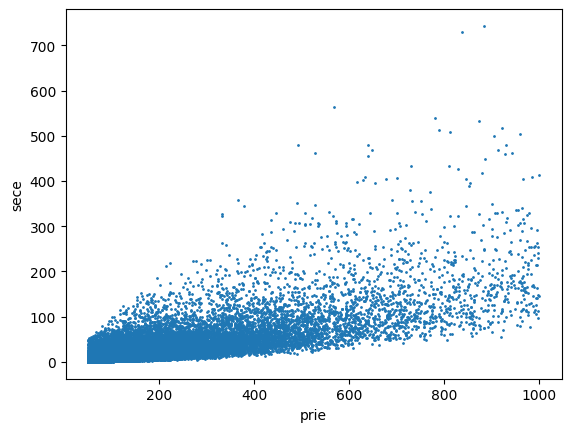

: 

In [94]:
plt.scatter(prie,secse,s=1)
plt.xlabel("prie")
plt.ylabel("sece")
plt.show()

In [51]:
print('events:',len(secs))
print('secs @ event[1]:',len(secs[1]))
print('sec[1] @ event[1]:',len(secs[1][1]))

events: 100000
secs @ event[1]: 224
sec[1] @ event[1]: 8


In [52]:
type(secs)


awkward.highlevel.Array

In [68]:
np.array(secs[1][:])[:,0]

array([ 1021.,  1021.,  1021.,  1021.,  3021.,  1021.,  1021.,  1021.,
        1021.,  1021.,  1021.,  1021.,  1021.,  1021.,  1021.,  1021.,
        1021.,  1021.,  1021.,  1021.,  3021.,  1021.,  1021.,  1021.,
        1021.,  1021.,  1021.,  1021.,  1021.,  2021.,  1021.,  1021.,
        1021.,  3021.,  1021.,  1021.,  3021.,  1021.,  1021.,  1021.,
        1021.,  1021.,  1021.,  1021.,  1021.,  1021.,  1021.,  1021.,
        1021.,  3021.,  1021.,  1021.,  1021.,  1021.,  1021.,  1021.,
        1021.,  1021.,  1021.,  1021.,  1021.,  1021.,  1021.,  1021.,
        1021.,  1021.,  1021.,  1021.,  1021.,  1021.,  1021.,  3021.,
        2021.,  1021.,  1021.,  1021.,  3021.,  1021.,  1021.,  1021.,
        1021.,  1021.,  1021.,  1021.,  1021.,  1021.,  1021.,  1021.,
        1021.,  1021.,  1021.,  1021.,  1021.,  1021.,  1021.,  6521.,
        1021.,  1021.,  3021.,  2021.,  1021.,  1021.,  1021.,  1021.,
        1021.,  5521.,  5031.,  1061., 13081., 13061., 13051.,  1061.,
      

In [64]:
len_sec = list()
for i in range(len(secs)):
    len_sec.append(len(secs[i]))

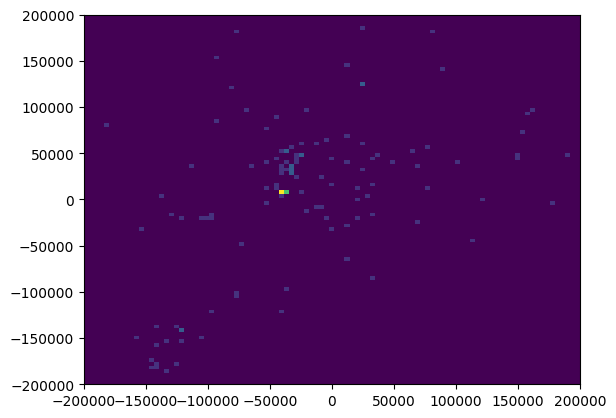

In [70]:
sec = np.array(secs[3])
sec=sec[:,:-1]
xbins = np.linspace(-2e5,2e5,100)
ybins = np.linspace(-2e5,2e5,100)
H,_,_ = np.histogram2d(sec[:,4],sec[:,5],bins=(xbins,ybins))
H=H.T
X,Y = np.meshgrid(xbins,ybins)
plt.pcolormesh(X, Y, H)